In [2]:
!pip install numpy

  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/82/0f/3f712cd84371636c5375d2dd70e7514d264cec6bdfc3d7997a4236e9f948/numpy-1.26.1-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/61.2 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.2 kB ? eta -:--:--
     ------------------- ------------------ 30.7/61.2 kB 325.1 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/61.2 kB 372.4 kB/s eta 0:00:01
     -------------------------------------- 61.2/61.2 kB 324.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/15.8 MB 2.6 MB/s eta 0:00:07
    --------------------------------------- 0.4/15.8 MB 4.4 MB/s eta 0:00:04
   - -------------------------------------- 0.7/15.8 MB 5.7 MB/s eta 0:00:03
   - -------------------------------------- 0.7/15.8 MB 5.7 MB/s eta 0:00:03
   -- --------------------------

In [4]:
!pip install pandas

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/2d/5e/9213ea10ac473e2437dc2cb17323ddc0999997e2713d6a0b683b10773994/pandas-2.1.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/32/4d/aaf7eff5deb402fd9a24a1449a8119f00d74ae9c2efa79f8ef9994261fc2/pytz-2023.3.post1-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/341.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/341.8 kB ? eta -:--:--
     -------- ------------------------------ 71.7/341.8 kB 2.0 MB/s eta 0:00:01
     -------------------- ----------------- 184.3/341.8 kB 2.2 MB/s eta 0:00:01
     -------------------------------------- 341.8/341.8 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   -- ------------------------------------- 0.6/10.6 MB 11.8 MB/s eta 0:00:01
   --- ------------------------------------ 1.0/

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
car_data = pd.read_csv("car data.csv")

In [8]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
car_data.shape

(301, 9)

In [10]:
car_data[['Seller_Type','Fuel_Type','Transmission','Owner']].apply(lambda x: x.unique())

Seller_Type      [Dealer, Individual]
Fuel_Type       [Petrol, Diesel, CNG]
Transmission      [Manual, Automatic]
Owner                       [0, 1, 3]
dtype: object

In [11]:
car_data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [12]:
car_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [13]:
car_data['Age'] = 2023 - car_data['Year']

In [14]:
car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,9
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,7
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,8
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,14
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,6


In [15]:
df = car_data.drop(columns = ['Car_Name','Year'])

In [16]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [17]:
df = pd.get_dummies(df,drop_first= True)

In [18]:
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [20]:
!pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
  Obtaining dependency information for matplotlib!=3.6.1,>=3.3 from https://files.pythonhosted.org/packages/40/d9/c1784db9db0d484c8e5deeafbaac0d6ed66e165c6eb4a74fb43a5fa947d9/matplotlib-3.8.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/e5/76/94bc17eb868f8c7397f8fdfdeae7661c1b9a35f3a7219da308596e8c252a/contourpy-1.1.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/ae/f6/724d2d236797ea7479a5a7ec8e69c2bee60cad7027

In [21]:
import seaborn as sns

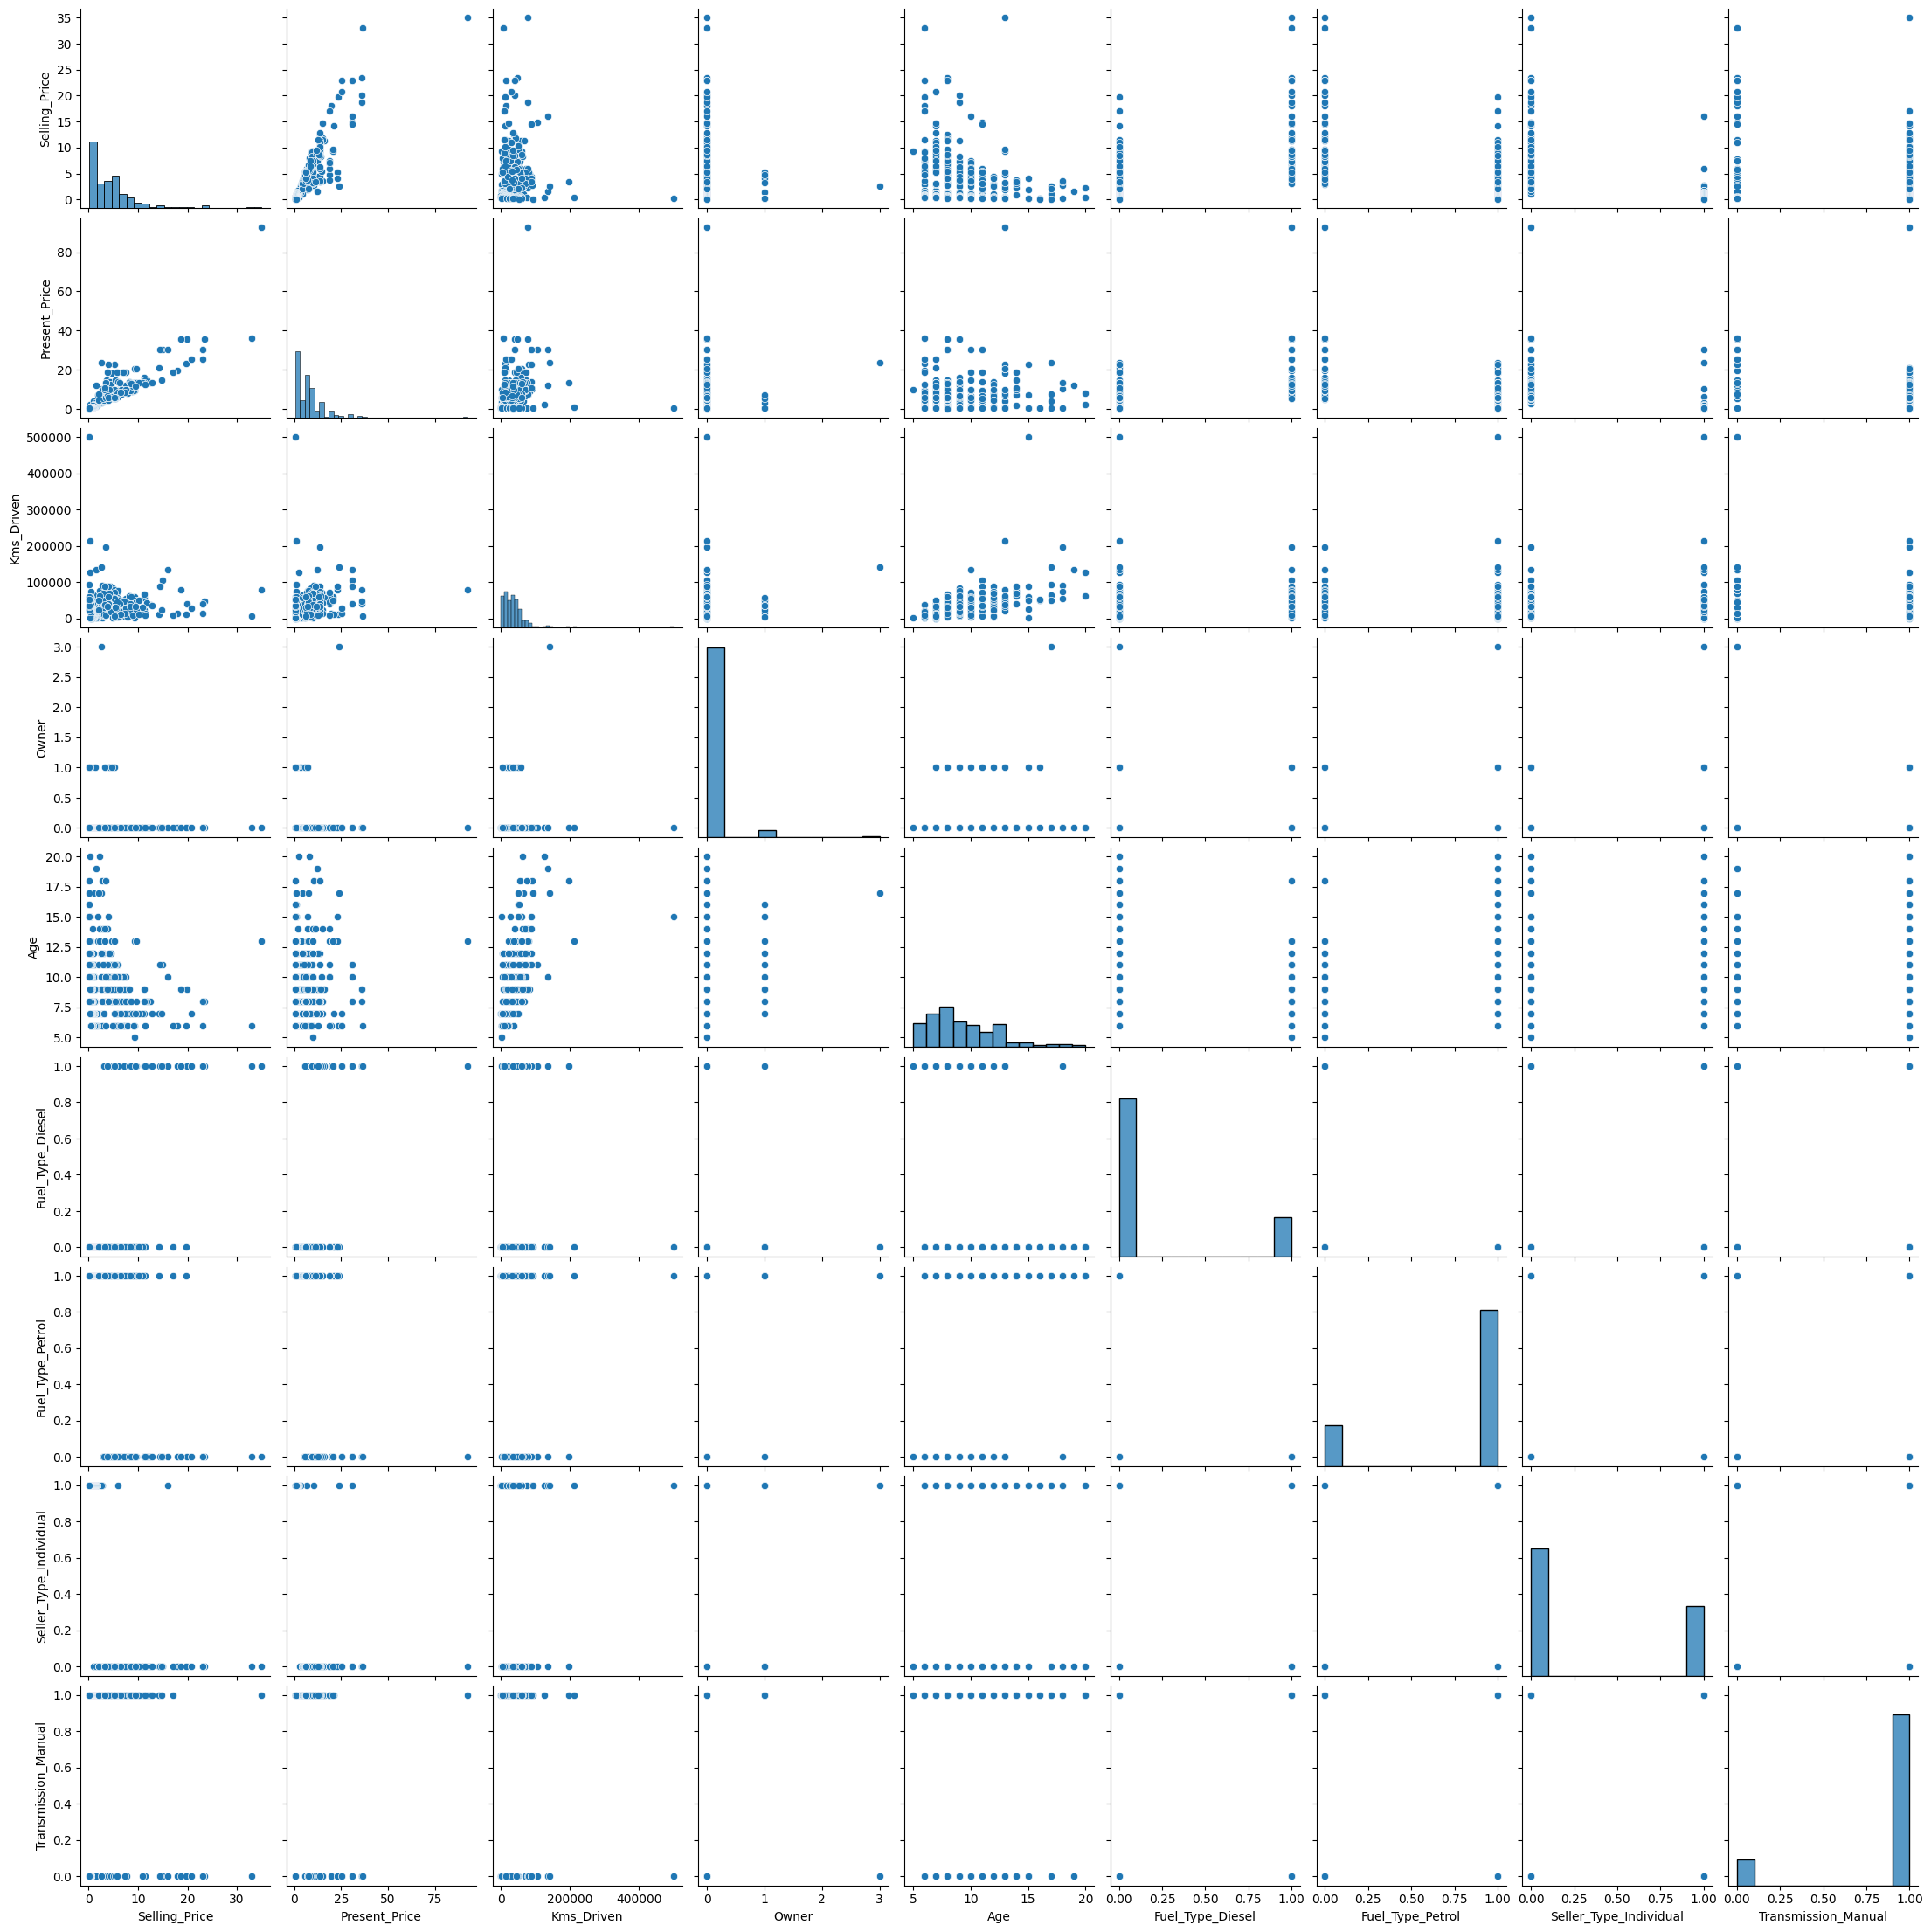

In [22]:
sns.pairplot(df)

In [23]:
import matplotlib.pyplot as plt

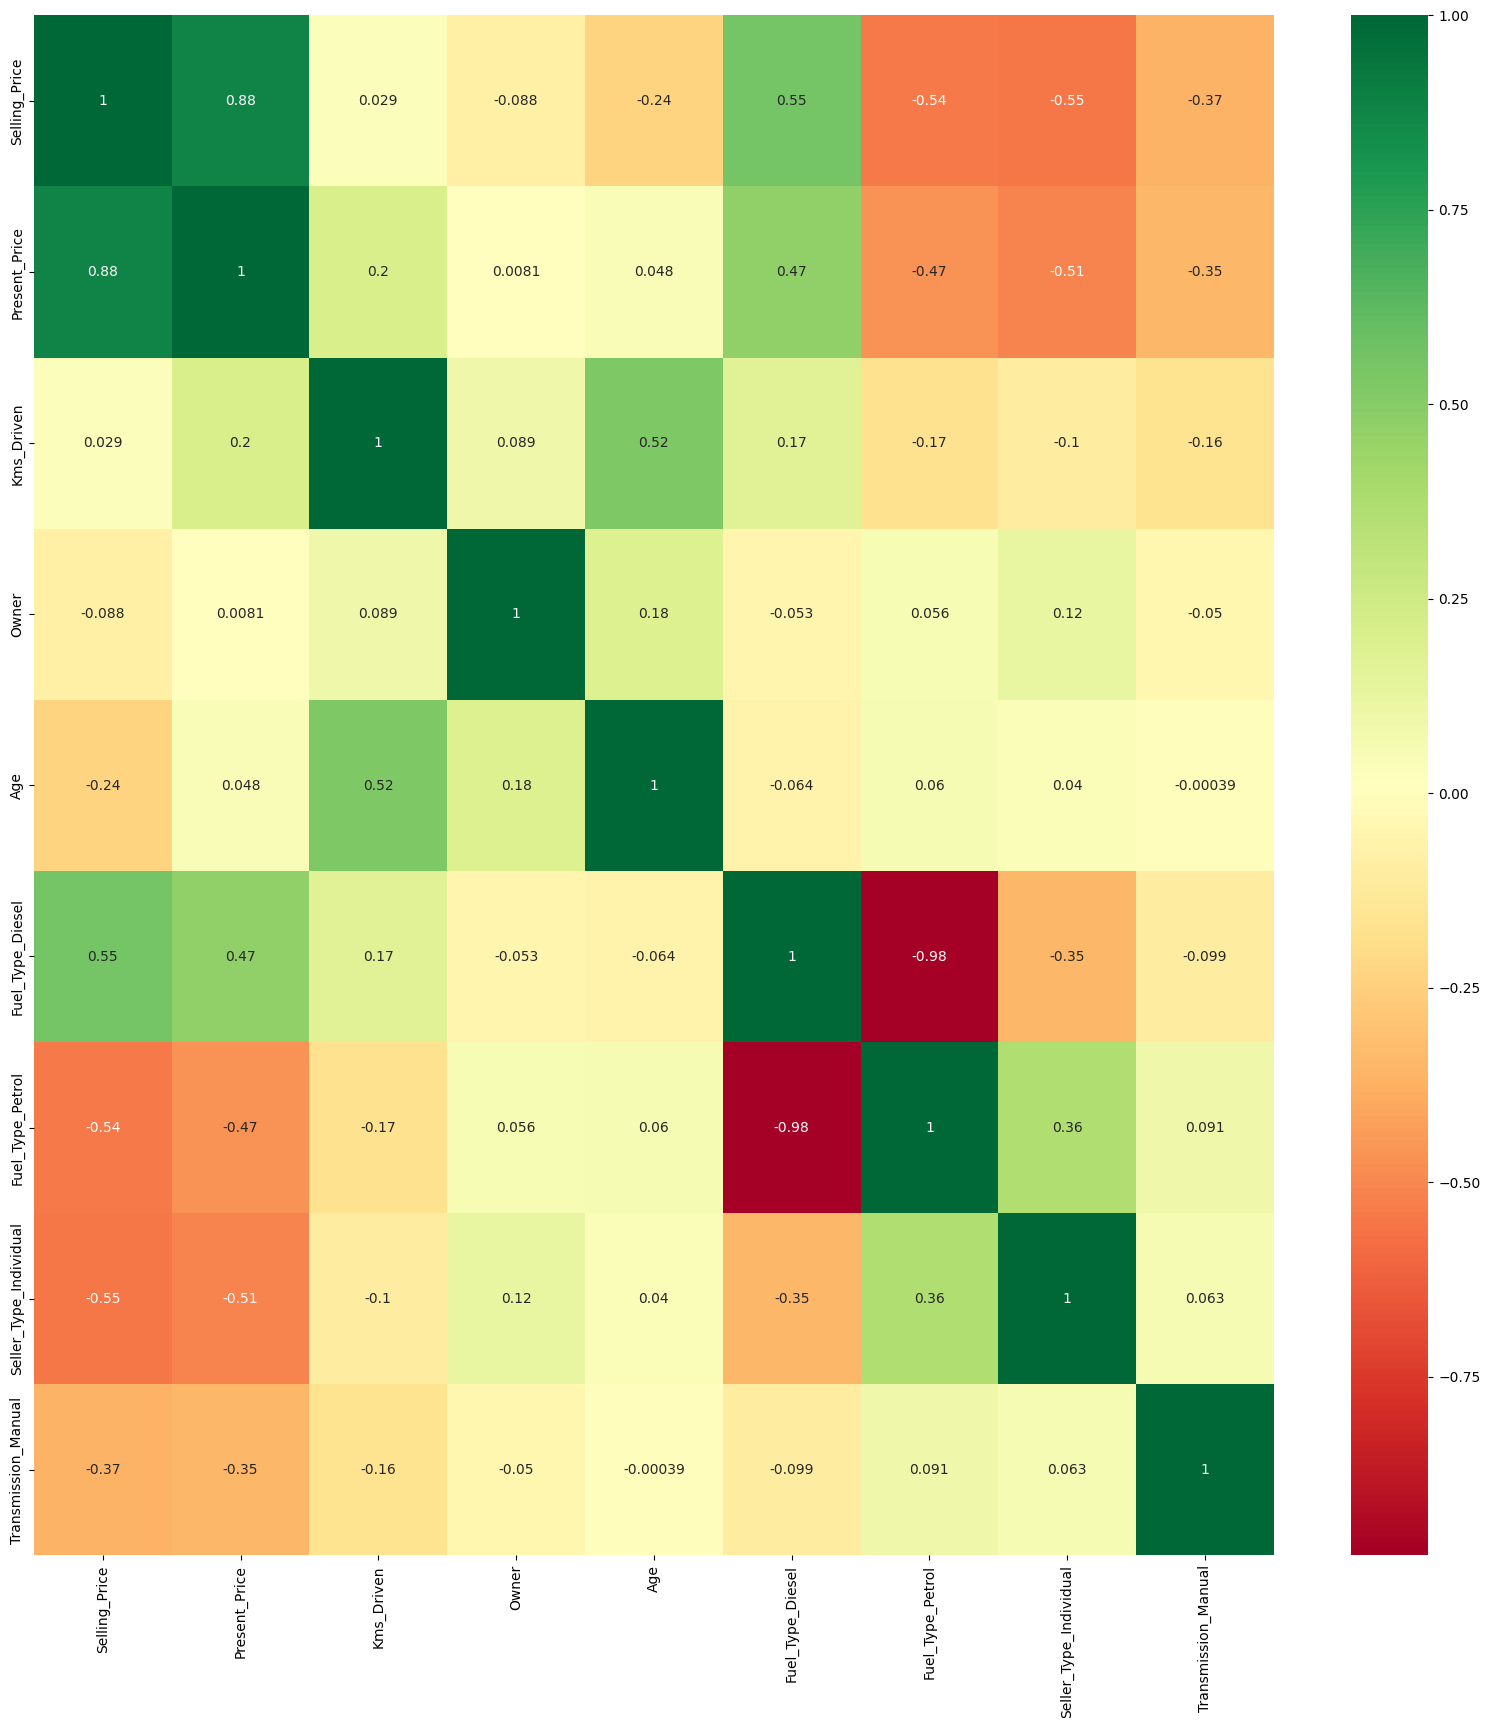

In [24]:
corrmat = df.corr()
best_corr_featr = corrmat.index
plt.figure(figsize=(20,20))
h = sns.heatmap(df[best_corr_featr].corr(),annot = True, cmap='RdYlGn')

In [25]:
X = df.iloc[:,1:]
y = df.iloc[:,0]
print(X.head())
print(y.head())

   Present_Price  Kms_Driven  Owner  Age  Fuel_Type_Diesel  Fuel_Type_Petrol  \
0           5.59       27000      0    9             False              True   
1           9.54       43000      0   10              True             False   
2           9.85        6900      0    6             False              True   
3           4.15        5200      0   12             False              True   
4           6.87       42450      0    9              True             False   

   Seller_Type_Individual  Transmission_Manual  
0                   False                 True  
1                   False                 True  
2                   False                 True  
3                   False                 True  
4                   False                 True  
0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64


In [33]:
!pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/f1/7d/2e562207176a5dcdad513085670674bb11ffaf37e1393eacb6d7fb502481/scikit_learn-1.3.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/81/d7/d2537d51efb692d0c411e64267ba349e7668d40f5bc73cefe78ccd650dcd/scipy-1.11.3-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     -------------------------------------- 60.4/60.4 kB 809.1 kB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f72

In [36]:
from sklearn.ensemble import ExtraTreesRegressor

In [37]:
etr = ExtraTreesRegressor()


In [38]:
etr.fit(X,y)

ExtraTreesRegressor()

In [39]:
print(etr.feature_importances_)

[3.70515985e-01 4.10642352e-02 3.04156769e-04 7.57061355e-02
 2.24776757e-01 1.55017683e-02 1.33388126e-01 1.38742836e-01]


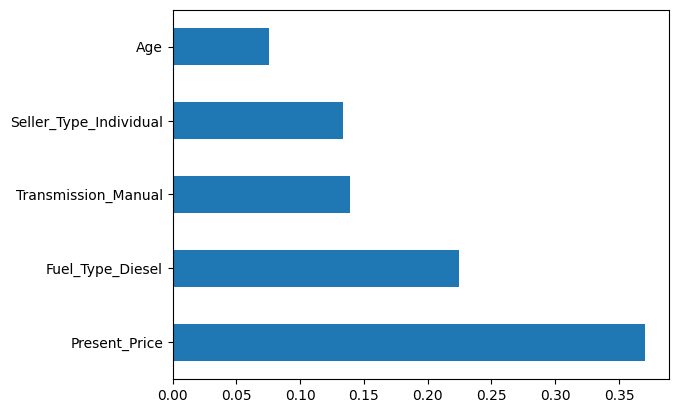

In [40]:
feature_importance = pd.Series(etr.feature_importances_,index = X.columns)
feature_importance.nlargest(5).plot(kind = 'barh')
plt.show()

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2)

In [42]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train,y_train)

RandomForestRegressor()

In [43]:
y_pred = rf_reg.predict(X_test)

In [44]:
sc= rf_reg.score(X_train,y_train)
sc

0.9814078716890325

In [45]:
sct = rf_reg.score(X_test,y_test)
sct

0.9533956442027769

In [46]:
# randomised search cv
n_estimators = [int(x) for x in np.linspace(100,1200,12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,6)]
min_samples_leaf = [1,2,5,10]

In [47]:
from sklearn.model_selection import RandomizedSearchCV
rand_grid = {'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_leaf':min_samples_leaf}
print(rand_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_leaf': [1, 2, 5, 10]}


In [48]:
rf_reg = RandomForestRegressor()

In [49]:
rf_random = RandomizedSearchCV(estimator=rf_reg,param_distributions=rand_grid)

In [50]:
rf_random.fit(X_train,y_train)

C:\Users\sumee\anaconda3\envs\car-prediction\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sumee\anaconda3\envs\car-prediction\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sumee\anaconda3\envs\car-prediction\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\sumee\anaconda3\envs\car-prediction\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    val

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]})

In [51]:
prediction = rf_random.predict(X_test)


In [52]:
prediction

array([ 4.42453333,  0.60556667,  0.57471667,  9.0032    ,  3.46758333,
        3.73516667,  0.86793333,  5.26693333,  2.62525   ,  0.36848333,
        0.60168333,  3.5808    ,  1.2185    , 10.66466667,  0.57878333,
        9.04015   ,  5.04951667,  2.72633333,  5.45433333, 10.69913333,
        2.61866667,  0.62096667,  0.35343333,  7.85831667,  0.86731667,
        5.23325   ,  0.31445   ,  6.59491667,  3.83997222,  4.46608333,
        6.35941667,  0.28336667,  3.72316667,  0.7498    ,  6.86016667,
       20.90225   ,  0.8953    ,  3.14815   ,  3.81105556,  4.5375    ,
        4.80591667,  6.68575   ,  5.17533333,  6.27766667,  8.21866667,
        0.47055   ,  3.70873333,  3.93358333,  0.53141667,  1.312     ,
        1.35491667,  5.02691667,  0.79305   ,  0.68338333,  5.53441667,
        5.14993889,  3.03875   ,  6.97275   ,  5.50078889,  4.50275   ,
        0.75581667])

C:\Users\sumee\AppData\Local\Temp\ipykernel_110164\1520944062.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


<Axes: xlabel='Selling_Price', ylabel='Density'>

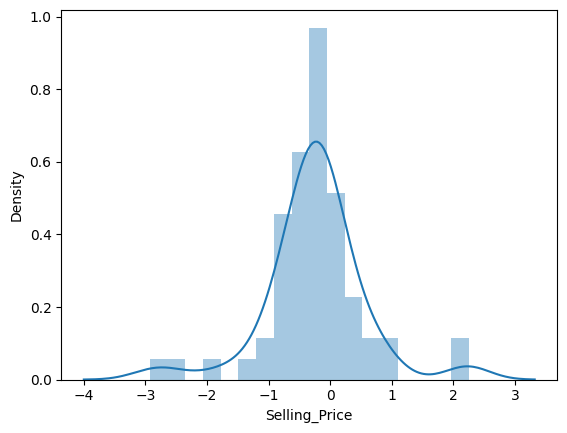

In [53]:
sns.distplot(y_test-prediction)

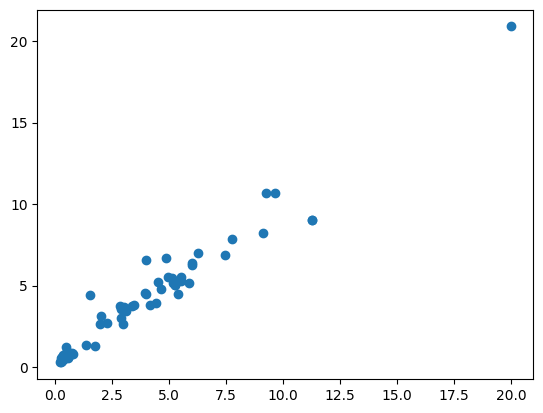

In [54]:
plt.scatter(y_test,prediction)

In [55]:
import pickle

In [56]:
file = open('random_forrest_regression_model.pkl','wb')
pickle.dump(rf_random,file)